In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
machine_temp=pd.read_csv('machine_temperature_system_failure.csv')

In [3]:
machine_temp.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [4]:
machine_temp.timestamp=pd.to_datetime(machine_temp.timestamp)

In [5]:
machine_temp.set_index('timestamp',inplace=True)

In [6]:
machine_temp.head()

,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


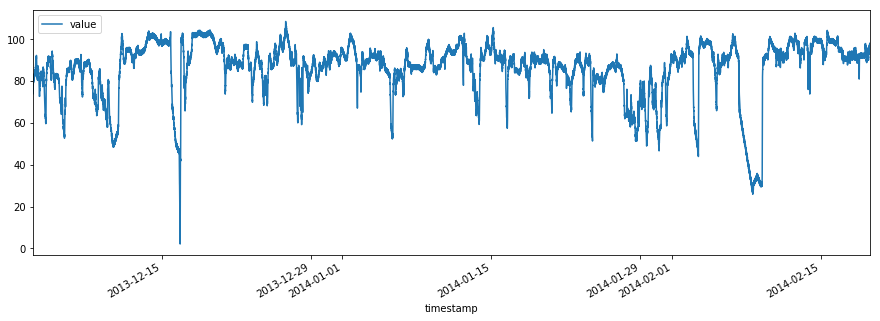

In [7]:
plt.figure(figsize=(19,1))
machine_temp['value'].plot(figsize=(15,5))

plt.legend()

In [8]:
machine_temp.shape

(22695, 1)

In [9]:
dataset_train=machine_temp[0:15887]
training_set = dataset_train.iloc[:,:].values

In [10]:
training_set.size

15887

In [11]:
dataset_test=machine_temp[15887:22696]
test_set = dataset_test.iloc[:,:].values

In [12]:
test_set

array([[86.68873144],
       [88.05350336],
       [88.44241872],
       ...,
       [97.13546835],
       [98.05685212],
       [96.90386085]])

In [13]:
test_set.size

6808

In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
for i in range(50, 15887):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train

array([[0.67542444, 0.68452524, 0.69569057, ..., 0.76438801, 0.78081281,
        0.78232803],
       [0.68452524, 0.69569057, 0.71463847, ..., 0.78081281, 0.78232803,
        0.77600754],
       [0.69569057, 0.71463847, 0.72581178, ..., 0.78232803, 0.77600754,
        0.78193468],
       ...,
       [0.85369376, 0.83734773, 0.82924448, ..., 0.81169949, 0.81099832,
        0.81299425],
       [0.83734773, 0.82924448, 0.82893577, ..., 0.81099832, 0.81299425,
        0.80498915],
       [0.82924448, 0.82893577, 0.83844246, ..., 0.81299425, 0.80498915,
        0.80949894]])

In [17]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train

array([[[0.67542444],
        [0.68452524],
        [0.69569057],
        ...,
        [0.76438801],
        [0.78081281],
        [0.78232803]],

       [[0.68452524],
        [0.69569057],
        [0.71463847],
        ...,
        [0.78081281],
        [0.78232803],
        [0.77600754]],

       [[0.69569057],
        [0.71463847],
        [0.72581178],
        ...,
        [0.78232803],
        [0.77600754],
        [0.78193468]],

       ...,

       [[0.85369376],
        [0.83734773],
        [0.82924448],
        ...,
        [0.81169949],
        [0.81099832],
        [0.81299425]],

       [[0.83734773],
        [0.82924448],
        [0.82893577],
        ...,
        [0.81099832],
        [0.81299425],
        [0.80498915]],

       [[0.82924448],
        [0.82893577],
        [0.83844246],
        ...,
        [0.81299425],
        [0.80498915],
        [0.80949894]]])

# Building the RNN - LSTM


## Importing the Keras libraries and packages

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


## Initialising the RNN

In [20]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 30, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding the second LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding a third LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(0.2))


## Adding a fourth LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

## Adding the output layer

In [83]:
regressor.add(Dense(units = 1))


## Compiling the RNN, setting loss function to MSE

In [84]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set over 100 epochs

In [101]:

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
15837/15837 [==============================] - 40s 3ms/step - loss: 6.0302e-04
Epoch 2/100
15837/15837 [==============================] - 40s 3ms/step - loss: 5.2528e-04
Epoch 3/100
15837/15837 [==============================] - 46s 3ms/step - loss: 5.1612e-04
Epoch 4/100
15837/15837 [==============================] - 41s 3ms/step - loss: 4.5426e-04
Epoch 5/100
15837/15837 [==============================] - 43s 3ms/step - loss: 3.9807e-04: 1s - loss: 4.01 - ETA: 0s - loss:
Epoch 6/100
15837/15837 [==============================] - 45s 3ms/step - loss: 4.0763e-04: 
Epoch 7/100
15837/15837 [==============================] - 41s 3ms/step - loss: 3.5250e-04
Epoch 8/100
15837/15837 [==============================] - 40s 3ms/step - loss: 3.4327e-04
Epoch 9/100
15837/15837 [==============================] - 42s 3ms/step - loss: 3.4085e-04
Epoch 10/100
15837/15837 [==============================] - 38s 2ms/step - loss: 3.1036e-04
Epoch 11/100
15837/15837 [==========================

In [102]:
# Getting the predictions
dataset_total = pd.concat((dataset_train['value'], dataset_test['value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 15887:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50,6808):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_machine_temp = regressor.predict(X_test)
predicted_machine_temp = sc.inverse_transform(predicted_machine_temp)

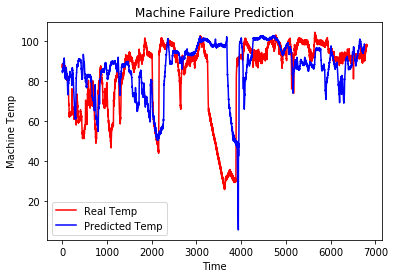

<Figure size 432x288 with 0 Axes>

In [103]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Temp')
plt.plot(predicted_machine_temp, color = 'blue', label = 'Predicted Temp')
plt.title('Machine Failure Prediction')
plt.xlabel('Time')
plt.ylabel('Machine Temp')
plt.legend()
plt.show()
plt.savefig('machine_lstm_100_epochs.png')

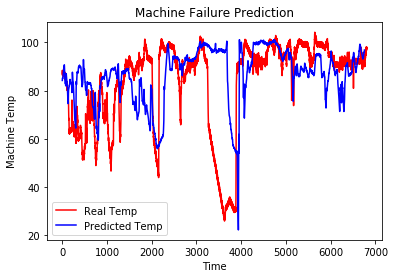

<Figure size 432x288 with 0 Axes>

In [100]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Temp')
plt.plot(predicted_machine_temp, color = 'blue', label = 'Predicted Temp')
plt.title('Machine Failure Prediction')
plt.xlabel('Time')
plt.ylabel('Machine Temp')
plt.legend()
plt.show()
plt.savefig('machine_lstm_pred1.png')


In [94]:
predicted_machine_temp

array([[84.24568 ],
       [84.50657 ],
       [84.80601 ],
       [85.0659  ],
       [85.2338  ],
       [85.25897 ],
       [85.19692 ],
       [85.12355 ],
       [85.07822 ],
       [85.06591 ],
       [85.095825],
       [85.140785],
       [85.17719 ],
       [85.24386 ],
       [85.37855 ],
       [85.58412 ],
       [85.84543 ],
       [86.11559 ],
       [86.35822 ],
       [86.54447 ]], dtype=float32)

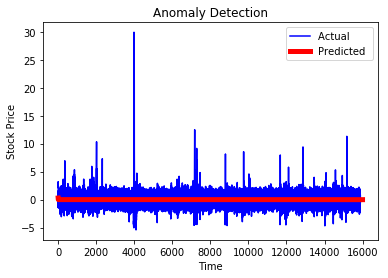

In [51]:
plt.plot(np.asarray(dataset_train['value']).reshape(-1,1), color = 'blue', label = 'Actual ')
plt.plot(pred, color = 'red', label = 'Predicted ' ,linewidth=5)
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
sns.jointplot(x='sqft_living',y='price',data=house_data)

plt.savefig("jp1")